In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import tplquad

In [2]:
# Parameters 
L = 10 # length of domain 
dx = dy = dz = 0.6 # mesh steps 
nx = ny = nz = int(L / dx) # mesh points in each dimension 
# k0s = np.linspace(0.1, 4, nx) # momentum of wave pakcket [au] (0.01 to 5) with nx points
k0 = 1
dt = 2 * dx**2 # time step 
nu = 1j * dt / (4 * dx**2) # kinetic energy operator must be less than one to be stable
xlin = ylin = zlin = np.linspace(0, L, nx) # is only a line 
X, Y, Z = np.meshgrid(xlin, ylin, zlin) # create rectangular grid of all x and y value combinations (3-3D arrays)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X, Y, Z)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()

In [3]:
# Gaussian wave packet
def get_psi0(k0): 
    x0 = L / 4  # center of the wave packet in x
    y0 = z0 = 0
    sigma = L / 10  # width of the wave packet
    # N = (np.pi * sigma ** 2)**(-1/2) # Normalization 2D
    N = (np.pi * sigma ** 2)**(-3/4) # Normalization 3D

    gaussian = np.exp(-(((X - x0) ** 2 + (Y - y0) ** 2 + (Z - z0) ** 2) / (2 * sigma ** 2))) # 3D
    # gaussian = np.exp(-(((X - x0) ** 2 + (Y - y0) ** 2) / (2 * sigma ** 2))) # 2D
    phase = np.exp(1j * k0 * X) # propagating only in x direction 
    psi0 = (gaussian * phase) * N # initial wave function

# # Check if normalized 
#     def integrand(X, Y, Z):
#         gaussian = np.exp(-(((X - x0) ** 2 + (Y - y0) ** 2 + (Z - z0) ** 2) / (2 * sigma ** 2))) # 3D
#         phase = np.exp(1j * k0 * X) # propagating only in x direction 
#         psi0 = (gaussian * phase) * N # initial wave function
#         return psi0 * np.conj(psi0)

#     norm, _ = tplquad(integrand, -np.inf, np.inf, -np.inf, np.inf, -np.inf, np.inf)
#     print(norm)

    return psi0

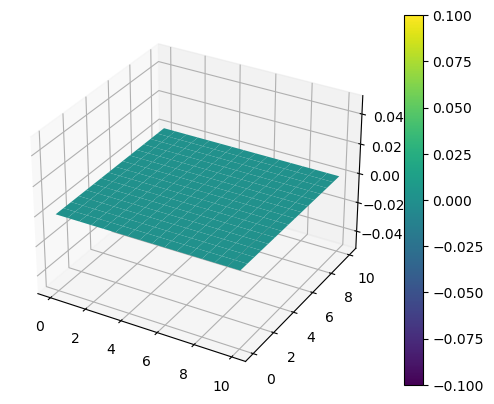

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [4]:
# Potential initial conditions 
def get_pot(): 
    V0 = 1 # potential strength, this will be on the z-axis 
    a = 0.05 # potential width percentage on x axis 
    b = 0.05 # width on y axis 

    # V_x = np.zeros(nx)
    # V_y = np.zeros(ny)
    # V_z = np.zeros(nz)

    start = int((nx - a * nx) / 2)
    end = int((nx + a * nx) / 2)

    V = np.zeros((nx, ny, nz))
    V[start:end, start:end, start:end] = V0

    # V_x[start:end] = V0
    # V_y[start:end] = V0

    # i_for_mid = np.count_nonzero(V_x)
    # middle = np.linspace(L/2 - (a*L), L/2 + (a*L), i_for_mid)
    # i_to_replace = min(end - start, i_for_mid)

    # for i in range(i_to_replace):
    #     V_x[start + i] = middle[i]
    #     V_y[start + i] = middle[i]
    
    # if np.nonzero(V_x):
    #     V_z[start:end] = V0

    # # V_x, V_y, V_z = np.meshgrid(V_x, V_y, V_z)

    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # ax.scatter(V_x,V_y,V_z)

    # Create 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create grid
    X, Y = np.meshgrid(np.linspace(0, L, nx), np.linspace(0, L, ny))
    Z = V[:, :, int(nz/2)]

    # Plot potential as a 3D surface
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')

    # Add color bar
    fig.colorbar(surf)

    plt.show()
            
    return V

get_pot()

In [5]:
# Build coefficient matrix, a+
def get_aplus():
    n = nx * ny * nz 
    aplus = np.zeros((n,n),complex)

    for i in range(len(aplus) - 1): # off diagonal 
        aplus[i,i+1] = aplus[i+1,i] = -nu 

    for i in range(len(aplus)): # diagonal
        aplus[i,i] = 1 + 2 * nu 

    aplus_inv = np.linalg.inv(aplus)
    
    return aplus_inv

get_aplus()

array([[0.5440393 -0.42769724j, 0.23268411+0.05652691j,
        0.03438275+0.07538285j, ..., 0.        -0.j        ,
        0.        -0.j        , 0.        -0.j        ],
       [0.23268411+0.05652691j, 0.57842204-0.35231439j,
        0.21953119+0.08200021j, ..., 0.        -0.j        ,
        0.        -0.j        , 0.        -0.j        ],
       [0.03438275+0.07538285j, 0.21953119+0.08200021j,
        0.56868007-0.35044481j, ..., 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       ...,
       [0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , ..., 0.56868007-0.35044481j,
        0.21953119+0.08200021j, 0.03438275+0.07538285j],
       [0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , ..., 0.21953119+0.08200021j,
        0.57842204-0.35231439j, 0.23268411+0.05652691j],
       [0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , ..., 0.03438275+0.07538285j,
 

In [6]:
# Build coefficient matrix, a-
def get_aminus():
    aminus = np.zeros((nx, nx),complex)

    for i in range(len(aminus)-1): # off diagonal 
        aminus[i,i+1] = aminus[i+1,i] = nu  

    for i in range(len(aminus)): # diagonal
        aminus[i,i] = 1 - 2 * nu 
    
    return aminus